In [9]:
from scipy.optimize import curve_fit

In [1]:
%pylab inline
import numpy as np
import tracpy.tools
import tracpy
import xarray

proj = tracpy.tools.make_proj('nwgom-pyproj')
loc = "http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

d = xarray.open_dataset(loc)

start_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 4348 + (i*8760) + leap*24
    start_time.append( time )

start_time = np.array(start_time)

end_time = []
leap = 0
for i in range(24):
    if (i+1)%4 == 0: leap += 1
    time = 744 + 4348 + (i*8760) + leap*24
    end_time.append( time )
    
end_time = np.array(end_time)


Populating the interactive namespace from numpy and matplotlib


In [15]:
braz_bins = np.linspace(0,0.5,300)
braz_hist = np.zeros(len(braz_bins)-1)

temp_hist = np.zeros(len(braz_bins)-1)

for yind in range(24):
# yind = 22
# print( yind )
braz_dye = d["dye_04"][ start_time[yind]-720 : end_time[yind]-720, :, 27:35, 301:310]
for time in range(744):
    temp_hist += np.histogram( braz_dye[time, :, :, :], braz_bins )[0]
    braz_hist = temp_hist

22


In [16]:
np.savez("braz_June2015", hist = braz_hist, bins = braz_bins)

In [7]:
def func(x, a, b, c, d ):
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d

    return y

In [51]:
# width = 0.8
# fig = plt.figure(figsize=(20,10),dpi=600)
# fig.tight_layout()   

# # All
# ax = fig.add_subplot(111)

# brazall = np.load("braz_all.npz")

# ax.bar( brazall["bins"][0:-1], ( (brazall["hist"][:])/23 ), width=0.002, color="black")
# # popt, pcov = curve_fit(func, brazall["bins"][11:-1], brazall["hist"][11:])
# # xdata = np.linspace(0, 0.04, 500 )
# # ax.plot( xdata, func( xdata, *popt), color="purple", linewidth=5 )
# # ax.set_ylim( 0, 3000)
# # ax.set_xlim( 0, 0.04)

# # ax.set_xticks( [0, 0.015, 0.03, 0.04] )
# # ax.set_xticklabels( [0, 0.015, 0.03, 0.1], fontsize=50 )
# # ax.set_xlabel( "Dye concentration", fontsize=60)

# # ax.set_yticks( [500, 1500, 2500] )
# # ax.set_yticklabels( ['', '', ''], fontsize=24 )
# # ax.set_ylabel( "Counts 1993-2016", fontsize=50)


# # 2016
# # ax2 = ax.twinx() 

# braz16 = np.load("braz_2016.npz")

# ax.bar( braz16["bins"][1:-1], (braz16["hist"][1:]), alpha=0.3, width=0.002, color="red")

# # braz15 = np.load("braz_June2015.npz")

# # ax2.bar( braz15["bins"][:-1], braz15["hist"][:], alpha=0.3, width=0.002, color="orange")
# # popt, pcov = curve_fit(func, braz16["bins"][1:-1], braz16["hist"][1:])
# # xdata = np.linspace(0, 0.04, 500 )
# # ax2.plot( xdata, func( xdata, *popt), color="black", linewidth=5 )
# # ax2.set_ylim( 0, 250000)

# # ax2.set_yticks( [25000, 112500, 200000] )
# # ax2.set_yticklabels( ['', '', ''], fontsize=24 )
# # ax2.set_ylabel( "Counts 2016", fontsize=50)

# # ax.text( 0.035, -90, "/ /", fontsize=60)
# # ax.text( 0.028, 2200, "Brazos", fontsize=80)
# # fig.savefig( "figures/brazdye.png")

# braz15 = np.load("braz_June2015.npz")

# ax.bar( braz15["bins"][1:-1], (braz15["hist"][1:]), alpha=0.3, width=0.002, color="blue")

# ax.set_ylim( 0, 300000 )
# ax.set_xlim( 0, 0.05 )

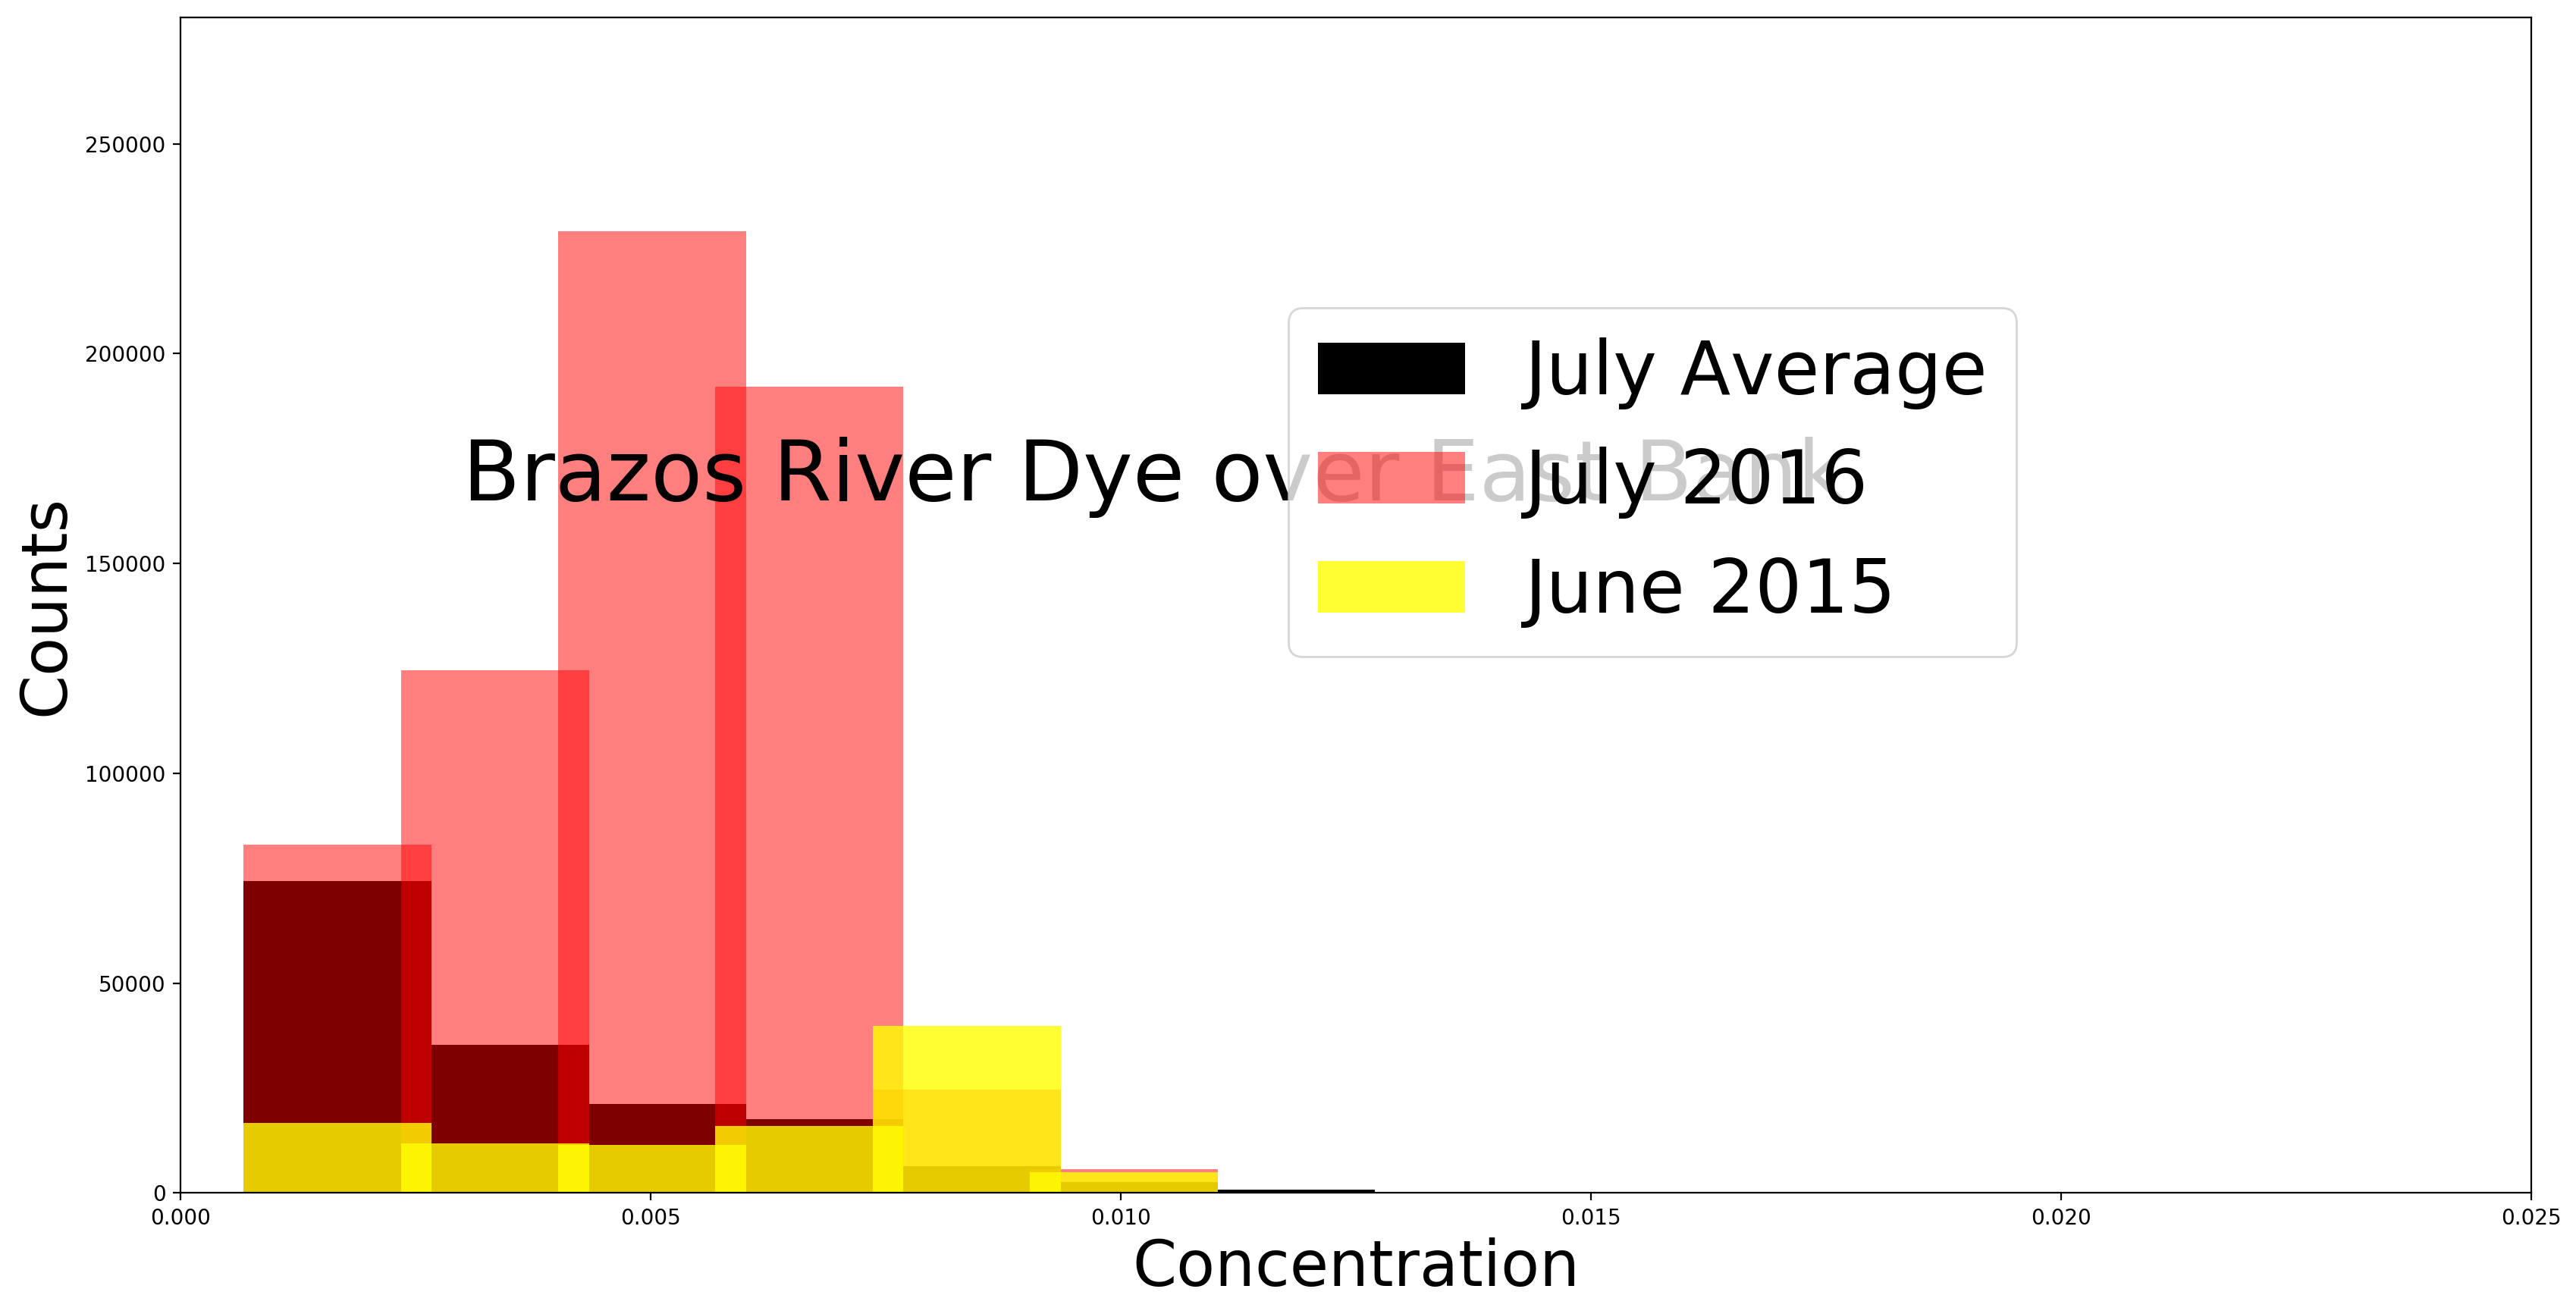

In [63]:
width = 0.8
fig = plt.figure(figsize=(20,10),dpi=200)
fig.tight_layout()   

# all
ax = fig.add_subplot(111)
ax.set_xlim(0,0.025)
ax.set_ylim(0, 280000)

brazall = np.load("braz_all.npz")
_all = ax.bar( brazall["bins"][1:-1], (brazall["hist"][1:]/23.), alpha=1, width=0.002, color="black")

braz16 = np.load("braz_2016.npz")
_16 = ax.bar( braz16["bins"][1:-1], (braz16["hist"][1:]), alpha=0.5, width=0.002, color="red")

braz15 = np.load("braz_June2015.npz")
_15 = ax.bar( braz15["bins"][1:-1], (braz15["hist"][1:]), alpha=0.8, width=0.002, color="yellow")

fig.legend( [_all, _16, _15], ["July Average", "July 2016", "June 2015"], loc=(0.5, 0.5), fontsize=35)

# ax.set_xticks( [0, 0.05, 0.1, 0.15] )
# ax.set_xticklabels( [0, 0.05, 0.1, 0.15], fontsize=30 )

# ax.set_yticks( [20000, 80000, 140000] )
# ax.set_yticklabels( [20000, 80000, 140000], fontsize=30 )

fig.subplots_adjust(top=0.9)
ax.text( 0.003, 165000, "Brazos River Dye over East Bank", fontsize=40 )
ax.set_xlabel( "Concentration", fontsize=30 )
ax.set_ylabel( "Counts", fontsize=30 )

fig.savefig("figures/brazhist_scaled.png")